In [1]:
import pandas as pd
from sklearn import datasets 

wine_dataset = datasets.load_wine()
wine_dataset.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])

In [2]:
print(wine_dataset["DESCR"])

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [5]:
X = pd.DataFrame(wine_dataset["data"], columns= wine_dataset["feature_names"])
y = wine_dataset["target"]
X.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_Train, X_Test, y_train, y_test = train_test_split(X,y, test_size = 0.3 , stratify = y, random_state = 0)

scaler = StandardScaler()

X_Train_scaled = scaler.fit_transform(X_Train)
X_Test_scaled = scaler.transform(X_Test)

In [7]:
import numpy as np 

cov_matrix = np.cov(X_Train_scaled, rowvar=False)
cov_matrix

array([[ 1.00813008,  0.06709556,  0.17405351, -0.35439069,  0.26374703,
         0.29079481,  0.21835807, -0.08111974,  0.10436705,  0.54282846,
         0.05893536, -0.01797029,  0.6415292 ],
       [ 0.06709556,  1.00813008,  0.08326463,  0.26356776, -0.11349172,
        -0.33735555, -0.41035281,  0.33653916, -0.21602672,  0.17504154,
        -0.551593  , -0.40561695, -0.24089991],
       [ 0.17405351,  0.08326463,  1.00813008,  0.46420355,  0.29092834,
         0.18020384,  0.15537535,  0.15918823, -0.00703776,  0.20549146,
         0.00665422,  0.02039019,  0.223495  ],
       [-0.35439069,  0.26356776,  0.46420355,  1.00813008, -0.07406447,
        -0.28060672, -0.31391899,  0.31581353, -0.24621059, -0.08872685,
        -0.22595587, -0.16799906, -0.46393412],
       [ 0.26374703, -0.11349172,  0.29092834, -0.07406447,  1.00813008,
         0.25667578,  0.21025773, -0.26003426,  0.19601657,  0.20606456,
         0.13359768,  0.06633258,  0.41810999],
       [ 0.29079481, -0.337355

In [8]:
eigen_vals, eigen_vects = np.linalg.eig(cov_matrix)
eigen_vals

array([4.84274532, 2.41602459, 1.54845825, 0.96120438, 0.84166161,
       0.6620634 , 0.51828472, 0.34650377, 0.3131368 , 0.10754642,
       0.21357215, 0.15362835, 0.1808613 ])

In [9]:
total = sum(eigen_vals)
exp_var = eigen_vals/total
exp_var

array([0.36951469, 0.18434927, 0.11815159, 0.07334252, 0.06422108,
       0.05051724, 0.03954654, 0.02643918, 0.02389319, 0.00820609,
       0.01629614, 0.01172226, 0.01380021])

In [10]:
exp_var_cum = exp_var.cumsum()
exp_var_cum

array([0.36951469, 0.55386396, 0.67201555, 0.74535807, 0.80957914,
       0.86009639, 0.89964293, 0.92608211, 0.9499753 , 0.95818139,
       0.97447753, 0.98619979, 1.        ])

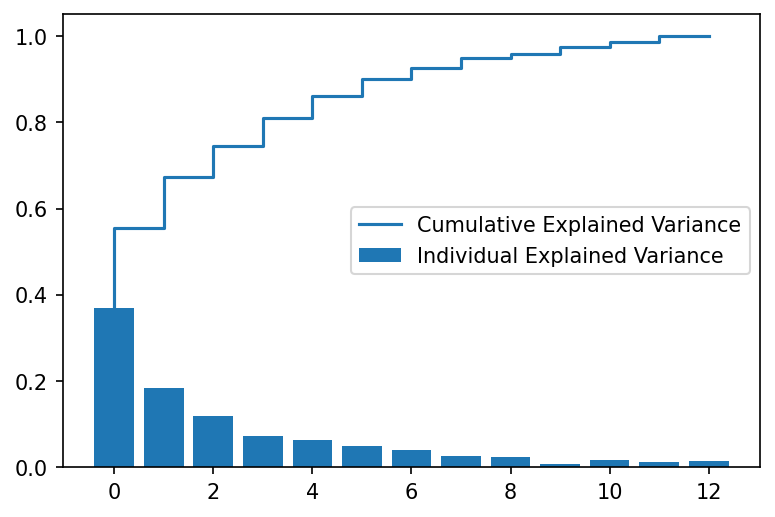

In [11]:
import matplotlib.pyplot as plt

plt.figure(dpi=150)
plt.bar(np.arange(0,13), exp_var, label = "Individual Explained Variance")
plt.step(np.arange(0,13), exp_var_cum, label = "Cumulative Explained Variance")

plt.legend()
plt.show()

In [12]:
W = np.array([eigen_vects[:,0], eigen_vects[:,1]]).transpose()
W.shape

(13, 2)

In [13]:
X_train_pca = X_Train_scaled.dot(W)
X_train_pca.shape

(124, 2)

In [14]:
X_Train_scaled.shape

(124, 13)

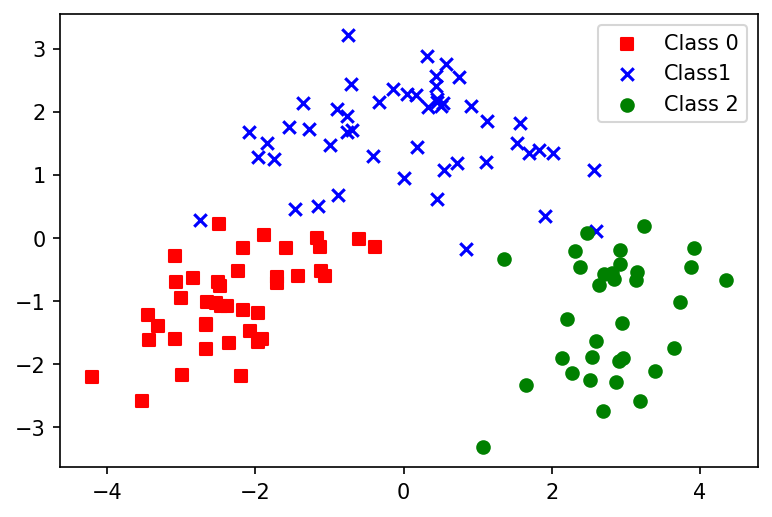

In [15]:
class_0 = X_train_pca[y_train==0]
class_1 = X_train_pca[y_train==1]
class_2 = X_train_pca[y_train==2]

plt.figure(dpi = 150)
plt.scatter(class_0[:,0] , class_0[:,1], marker="s", color = "r")
plt.scatter(class_1[:,0] , class_1[:,1], marker="x", color = "b")
plt.scatter(class_2[:,0] , class_2[:,1], marker="o", color = "g")
plt.legend(["Class 0" , "Class1", "Class 2"])

plt.show()

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report

pca = PCA(n_components=8)

X_train_pca = pca.fit_transform(X_Train_scaled)
X_test_pca = pca.transform(X_Test_scaled)

lr = LogisticRegression()
lr.fit(X_train_pca, y_train)
predictions = lr.predict(X_test_pca)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00        15

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54

